## The purpose of this notebook is to demonstrate knowledge in the use of Principle Component Analysis (PCA) to reduce dimensionality of features, for visualization and classification.
## PCA is a widely used unsupervised Machine Learning algorithm 

### 1. Import Essential Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Read csv file to import data in a dataframe


In [2]:
df = pd.read_csv('lithium-ion batteries.csv')

In [3]:
df.head()


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [4]:
df.columns


Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

### 3. We drop columns that are non-numeric and replace the column 'Crystal System' by numeric values

In [5]:
df.drop(['Materials Id', 'Formula', 'Spacegroup','Has Bandstructure'], axis=1, inplace=True)

In [6]:
df.replace({'Crystal System':{'monoclinic':0, 'triclinic':1,'orthoclinic':3}}, inplace = True)

In [7]:
df.head(5)

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Crystal System
0,-2.699,0.006,3.462,16,2.993,178.513,0
1,-2.696,0.008,2.879,32,2.926,365.272,0
2,-2.775,0.012,3.653,28,2.761,301.775,0
3,-2.783,0.013,3.015,38,2.908,436.183,0
4,-2.747,0.016,2.578,36,3.334,421.286,0


In [8]:
df.head(5)

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Crystal System
0,-2.699,0.006,3.462,16,2.993,178.513,0
1,-2.696,0.008,2.879,32,2.926,365.272,0
2,-2.775,0.012,3.653,28,2.761,301.775,0
3,-2.783,0.013,3.015,38,2.908,436.183,0
4,-2.747,0.016,2.578,36,3.334,421.286,0


### 4. We now divide the dataset into feature and target dataset

In [9]:
df_feature=df.iloc[:,0:6]

In [10]:
df_feature.head(5)

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
0,-2.699,0.006,3.462,16,2.993,178.513
1,-2.696,0.008,2.879,32,2.926,365.272
2,-2.775,0.012,3.653,28,2.761,301.775
3,-2.783,0.013,3.015,38,2.908,436.183
4,-2.747,0.016,2.578,36,3.334,421.286


In [11]:
df_target=df.iloc[:,-1]

### 5. We use the StandardScaler library of sklearn to normalize the feature variables. Normalization is a process of shifting the population mean to 0 with stdev = 1. 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_feature)
df_scaled

array([[-0.44704807, -1.72225297,  1.2723743 , -0.98869048,  0.02545524,
        -0.98976895],
       [-0.43070265, -1.65628565,  0.73572097, -0.2960197 , -0.16410703,
        -0.3507142 ],
       [-0.86113207, -1.52435101,  1.44819041, -0.4691874 , -0.63093948,
        -0.56798919],
       ...,
       [ 0.47919246,  0.78450515, -1.75239905, -0.16614393, -0.124497  ,
        -0.13385326],
       [ 1.46536619,  0.94942345, -0.6873769 , -1.07527433, -1.50801863,
        -0.86818844],
       [ 1.14935472,  1.04837443, -1.61708508, -1.0319824 ,  0.16691962,
        -0.99765966]])

### 6. We import PCA from sklearn.decomposition and specify total number of components as 2

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [14]:
x_pca=pca.transform(df_scaled)


### 7. The cumulative explained variance ratio shows how much of the original data variance is captured in the 2 Principle components. 
#### In our case, our 2 PCA accounts for 69% of the variation from the original dataset. This is not ideal but we'll see how the final results look like.


In [15]:
pca.explained_variance_ratio_.cumsum()

array([0.41458948, 0.69279529])

### 8. We now put our PCA data into a DataFrame for convenience.

In [16]:
df_x_pca=pd.DataFrame(data=x_pca, columns=['PC1','PC2'])

In [17]:
df_x_pca

,PC1,PC2
0,-0.131661,-2.530181
1,0.406331,-1.692005
2,0.817056,-2.317420
3,0.914121,-1.590049
4,0.135599,-1.171467
...,...,...
334,-0.768272,-0.846557
335,-1.796571,2.129873
336,-1.036851,1.274752
337,-1.414845,0.234380


In [18]:
df = pd.read_csv('lithium-ion batteries.csv')

### 9. When we plot our PC1 vs PC2, we see that there is an overlap of the 2 class of target variable. Ideally the separation must be clearly evident, but that's not the case here. 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

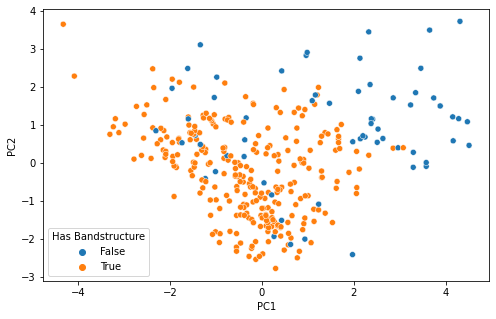

In [25]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=df_x_pca,x='PC1',y='PC2',hue=df['Has Bandstructure'])


### 10. PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data.  In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

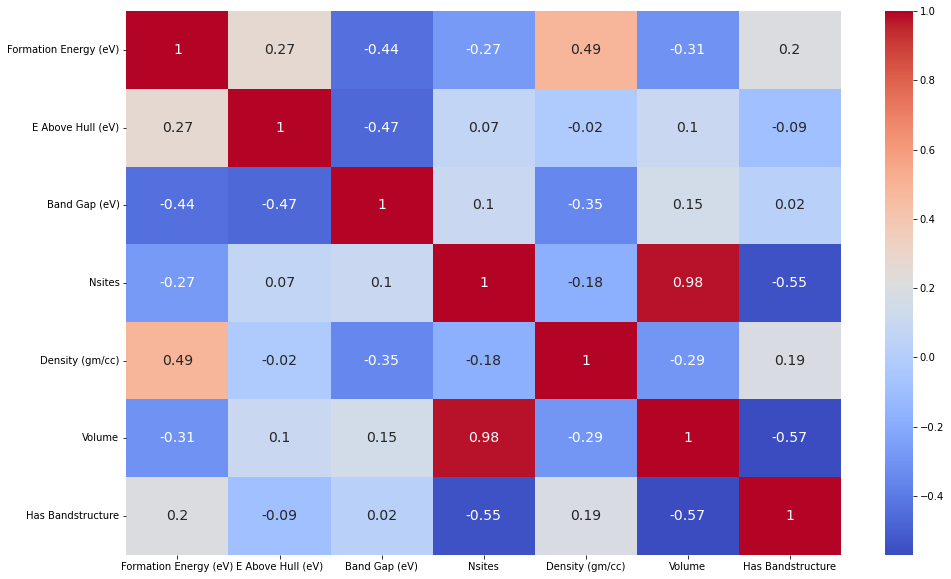

In [21]:
plt.figure(figsize = (16,10))
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":14})
plt.show()

### In conclusion, we have demonstarted an understanding of how Principle Component Analysis (PCA) unsupervised machine learning algorithm can be used to reduce dimensionality in feature variables, for easy visualization or classification. In our specific example, PCA did not yeild fruitful results as desired. 